# Лабораторная работа №4. Основы нейронных сетей
## Общее задание

Перед выполнением лабораторной работы необходимо загрузить набор данных в соответствии с вариантом на диск
1. Написать программу, которая разделяет исходную выборку на обучающую и тестовую (training set, validation set, test set), если такое разделение не предусмотрено предложенным набором данных.
2. Произвести масштабирование признаков (scaling).
3. С использованием библиотеки [scikit-learn](http://scikit-learn.org/stable/) обучить 2 модели нейронной сети (Perceptron и MLPClassifier) по обучающей выборке. Перед обучением необходимо осуществить масштабирование признаков. 
[Пример MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)
Пример и описание [Perceptron](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html)
4. Проверить точность модели по тестовой выборке.
5. Провести эксперименты и определить наилучшие параметры коэффициента обучения, параметра регуляризации, функции оптимизации.
Данные экспериментов необходимо представить в отчете (графики, ход проведения эксперимента, выводы).



Обучающая: (8844, 30)
Тестовая: (2211, 30)
R Perceptron 0.8887
R MLP 0.9711
Коэффициент обучения 0.001: точность = 0.9720
Коэффициент обучения 0.01: точность = 0.9683
Коэффициент обучения 0.1: точность = 0.9588
Коэффициент обучения 0.5: точность = 0.9254


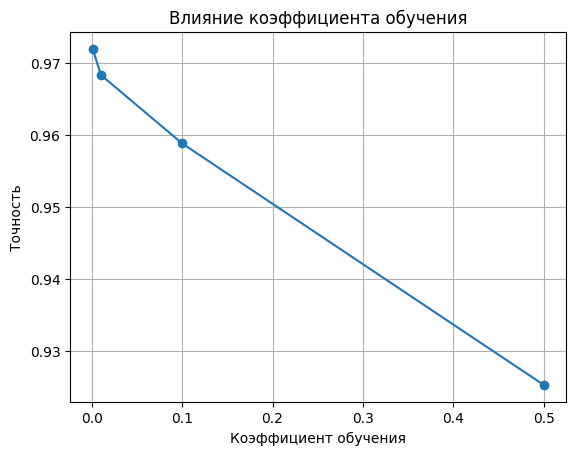

Регуляризация 0.0001: точность = 0.9720
Регуляризация 0.001: точность = 0.9683


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:788: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Регуляризация 0.01: точность = 0.9729
Регуляризация 0.1: точность = 0.9701
Регуляризация 1.0: точность = 0.9475


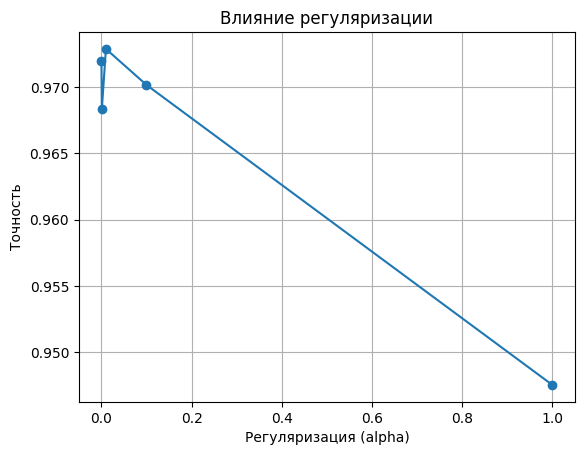

Оптимизация sgd: точность = 0.9502


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from scipy.io import arff

data, meta = arff.loadarff('Training Dataset.arff') 

df = pd.DataFrame(data)
df = df.astype(float)

X = df.drop('Result', axis=1) 
y = df['Result'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(f"Обучающая: {X_train.shape}")
print(f"Тестовая: {X_test.shape}")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

perceptron = Perceptron(random_state=42)
perceptron.fit(X_train_scaled, y_train)

mlp = MLPClassifier(random_state=42, max_iter=1000) 
mlp.fit(X_train_scaled, y_train)

y_pred_perceptron = perceptron.predict(X_test_scaled)
y_pred_mlp = mlp.predict(X_test_scaled)

accuracy_perceptron = accuracy_score(y_test, y_pred_perceptron)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

print(f"R Perceptron {accuracy_perceptron:.4f}")
print(f"R MLP {accuracy_mlp:.4f}")

learning_rates = [0.001, 0.01, 0.1, 0.5]
learning_rate_results = []

for lr in learning_rates:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        learning_rate_init=lr,
        random_state=42,
        max_iter=500
    )
    mlp.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
    learning_rate_results.append(accuracy)
    print(f"Коэффициент обучения {lr}: точность = {accuracy:.4f}")
plt.plot(learning_rates, learning_rate_results, marker='o', label="learning_rate")
plt.xlabel('Коэффициент обучения')
plt.ylabel('Точность')
plt.title('Влияние коэффициента обучения')
plt.grid(True)
plt.show()
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
alpha_results = []

for alpha in alphas:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        alpha=alpha,
        random_state=42,
        max_iter=500
    )
    mlp.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
    alpha_results.append(accuracy)
    print(f"Регуляризация {alpha}: точность = {accuracy:.4f}")
plt.plot(alphas, alpha_results, marker='o', label="alpha")
plt.xlabel('Регуляризация (alpha)')
plt.ylabel('Точность')
plt.title('Влияние регуляризации')
plt.grid(True)
plt.show()
solvers = ['sgd', 'adam', 'lbfgs']
solver_results = []

for solver in solvers:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        solver=solver,
        random_state=42,
        max_iter=500
    )
    mlp.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
    solver_results.append(accuracy)
    print(f"Оптимизация {solver}: точность = {accuracy:.4f}")
plt.plot(solvers, solver_results)
plt.xlabel('Оптимизация')
plt.ylabel('Точность')
plt.title('Влияние оптимизации')
plt.grid(True)
plt.show()

best_lr = learning_rates[np.argmax(learning_rate_results)]
best_alpha = alphas[np.argmax(alpha_results)]
best_solver = solvers[np.argmax(solver_results)]

print(f"Лучший коэффициент обучения: {best_lr}")
print(f"Лучшая регуляризация: {best_alpha}")
print(f"Лучший оптимизация: {best_solver}")

learning_rates = [0.001, 0.01, 0.1, 0.5]
learning_rate_results = []

for lr in learning_rates:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        learning_rate_init=lr,
        random_state=42,
        max_iter=500
    )
    mlp.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
    learning_rate_results.append(accuracy)
    print(f"Коэффициент обучения {lr}: точность = {accuracy:.4f}")
plt.plot(learning_rates, learning_rate_results, marker='o', label="learning_rate")
plt.xlabel('Коэффициент обучения')
plt.ylabel('Точность')
plt.title('Влияние коэффициента обучения')
plt.grid(True)
plt.show()
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
alpha_results = []

for alpha in alphas:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        alpha=alpha,
        random_state=42,
        max_iter=500
    )
    mlp.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
    alpha_results.append(accuracy)
    print(f"Регуляризация {alpha}: точность = {accuracy:.4f}")
plt.plot(alphas, alpha_results, marker='o', label="alpha")
plt.xlabel('Регуляризация (alpha)')
plt.ylabel('Точность')
plt.title('Влияние регуляризации')
plt.grid(True)
plt.show()
solvers = ['sgd', 'adam', 'lbfgs']
solver_results = []

for solver in solvers:
    mlp = MLPClassifier(
        hidden_layer_sizes=(50,),
        solver=solver,
        random_state=42,
        max_iter=500
    )
    mlp.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
    solver_results.append(accuracy)
    print(f"Оптимизация {solver}: точность = {accuracy:.4f}")
plt.plot(solvers, solver_results)
plt.xlabel('Оптимизация')
plt.ylabel('Точность')
plt.title('Влияние оптимизации')
plt.grid(True)
plt.show()

best_lr = learning_rates[np.argmax(learning_rate_results)]
best_alpha = alphas[np.argmax(alpha_results)]

print(f"Лучший коэффициент обучения: {best_lr}")
print(f"Лучшая регуляризация: {best_alpha}")

In [1]:
data, meta = arff.loadarff('Training Dataset.arff') 
df = pd.DataFrame(data).astype(float)
X = df.drop('Result', axis=1) 
y = df['Result'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Обучающая: {X_train.shape}, Тестовая: {X_test.shape}")

learning_rates = [0.001, 0.01, 0.1, 0.5]
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
solvers = ['sgd', 'adam', 'lbfgs']

perceptron_lr_accuracies = []
mlp_lr_accuracies = []

for lr in learning_rates:
    
    perceptron = Perceptron(eta0=lr, max_iter=1000)
    perceptron.fit(X_train_scaled, y_train)
    perceptron_acc = accuracy_score(y_test, perceptron.predict(X_test_scaled))
    perceptron_lr_accuracies.append(perceptron_acc)
    
    
    mlp = MLPClassifier(learning_rate_init=lr, max_iter=500)
    mlp.fit(X_train_scaled, y_train)
    mlp_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    mlp_lr_accuracies.append(mlp_acc)
    
    print(f"LR {lr}: Perceptron={perceptron_acc:.4f}, MLP={mlp_acc:.4f}")

perceptron_alpha_accuracies = []
mlp_alpha_accuracies = []

for alpha in alphas:
    
    perceptron = Perceptron(alpha=alpha, max_iter=1000)
    perceptron.fit(X_train_scaled, y_train)
    perceptron_acc = accuracy_score(y_test, perceptron.predict(X_test_scaled))
    perceptron_alpha_accuracies.append(perceptron_acc)
    
    
    mlp = MLPClassifier(alpha=alpha, max_iter=500)
    mlp.fit(X_train_scaled, y_train)
    mlp_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    mlp_alpha_accuracies.append(mlp_acc)
    
    print(f"Alpha {alpha}: Perceptron={perceptron_acc:.4f}, MLP={mlp_acc:.4f}")

mlp_solver_accuracies = []

for solver in solvers:
    mlp = MLPClassifier(solver=solver, max_iter=500)
    mlp.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
    mlp_solver_accuracies.append(accuracy)
    print(f"Solver {solver}: {accuracy:.4f}")

plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.plot(learning_rates, perceptron_lr_accuracies, marker='o', label='Perceptron')
plt.plot(learning_rates, mlp_lr_accuracies, marker='o', label='MLP')
plt.xlabel('Коэффициент обучения')
plt.ylabel('Точность')
plt.title('Влияние коэффициента обучения')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(alphas, perceptron_alpha_accuracies, marker='o', label='Perceptron')
plt.plot(alphas, mlp_alpha_accuracies, marker='o', label='MLP')
plt.xlabel('Регуляризация (alpha)')
plt.ylabel('Точность')
plt.title('Влияние регуляризации')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(solvers, mlp_solver_accuracies)
plt.xlabel('Оптимизатор')
plt.ylabel('Точность')
plt.title('MLP: Влияние оптимизатора')
plt.grid(True)

plt.tight_layout()
plt.show()


NameError: name 'arff' is not defined

Обучающая: (8844, 30), Тестовая: (2211, 30)
Perceptron R (базовый): 0.8982
MLP R (базовый): 0.9656
LR 0.001: Perceptron=0.8910, MLP=0.9656
LR 0.01: Perceptron=0.8910, MLP=0.9597
LR 0.1: Perceptron=0.8982, MLP=0.9570
LR 0.5: Perceptron=0.8982, MLP=0.9195
LR 1.0: Perceptron=0.8982, MLP=0.9172
Alpha 0.0001: Perceptron=0.8982, MLP=0.9656
Alpha 0.001: Perceptron=0.8982, MLP=0.9611
Alpha 0.01: Perceptron=0.8982, MLP=0.9652
Alpha 0.1: Perceptron=0.8982, MLP=0.9629
Alpha 1.0: Perceptron=0.8982, MLP=0.9498
Solver sgd: 0.9507
Solver adam: 0.9656
Solver lbfgs: 0.9602
Лучшие коэффициенты Perceptron - LR: 0.1, Alpha: 0.0001
Лучшие коэффициенты MLP - LR: 0.001, Alpha: 0.0001, Solver: adam


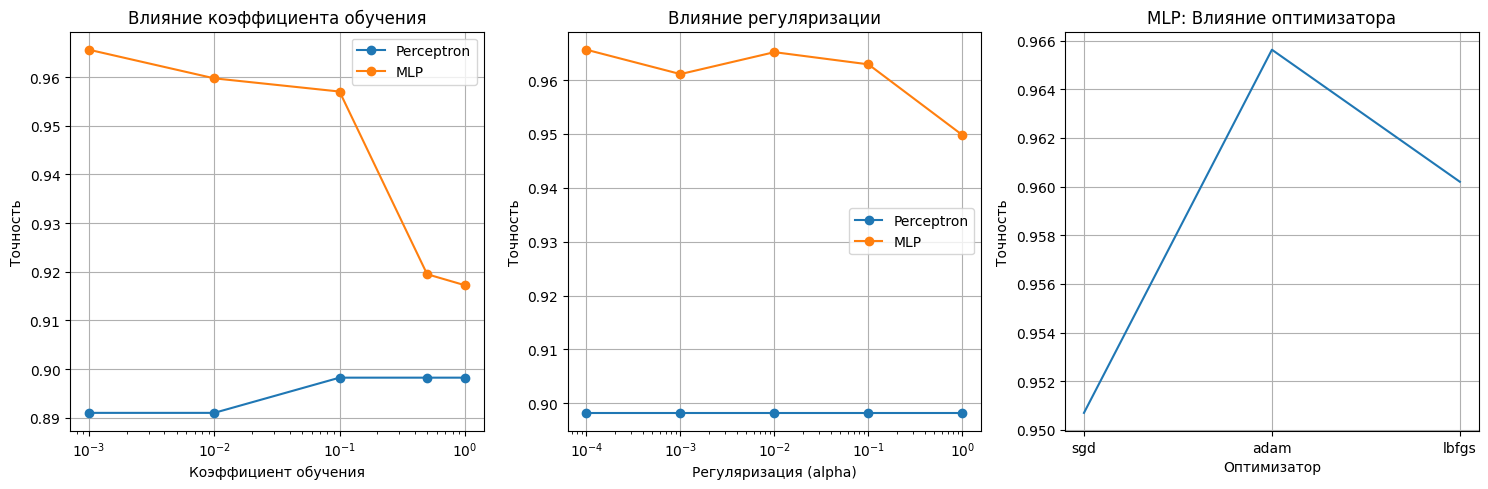

Perceptron R (лучшие коэфффициенты): 0.8982
MLP R (лучшие коэффициенты): 0.9656
Изменение Perceptron: 0.0000
Изменение MLP: 0.0000


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

data, meta = arff.loadarff('Training Dataset.arff') 
df = pd.DataFrame(data).astype(float)
X = df.drop('Result', axis=1) 
y = df['Result'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Обучающая: {X_train.shape}, Тестовая: {X_test.shape}")

perceptron_base = Perceptron(random_state=1)
perceptron_base.fit(X_train_scaled, y_train)
perceptron_base_acc = accuracy_score(y_test, perceptron_base.predict(X_test_scaled))

mlp_base = MLPClassifier(random_state=1, max_iter=1000)
mlp_base.fit(X_train_scaled, y_train)
mlp_base_acc = accuracy_score(y_test, mlp_base.predict(X_test_scaled))

print(f"Perceptron R (базовый): {perceptron_base_acc:.4f}")
print(f"MLP R (базовый): {mlp_base_acc:.4f}")

learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0]
alphas = [0.0001, 0.001, 0.01, 0.1, 1.0]
solvers = ['sgd', 'adam', 'lbfgs']

perceptron_lr_accuracies = []
mlp_lr_accuracies = []

for lr in learning_rates:
    
    perceptron = Perceptron(eta0=lr, max_iter=1000, random_state=1)
    perceptron.fit(X_train_scaled, y_train)
    perceptron_acc = accuracy_score(y_test, perceptron.predict(X_test_scaled))
    perceptron_lr_accuracies.append(perceptron_acc)
    
    
    mlp = MLPClassifier(learning_rate_init=lr, max_iter=1000, random_state=1)
    mlp.fit(X_train_scaled, y_train)
    mlp_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    mlp_lr_accuracies.append(mlp_acc)
    
    print(f"LR {lr}: Perceptron={perceptron_acc:.4f}, MLP={mlp_acc:.4f}")

perceptron_alpha_accuracies = []
mlp_alpha_accuracies = []


for alpha in alphas:
    
    perceptron = Perceptron(alpha=alpha, max_iter=1000, random_state=1)
    perceptron.fit(X_train_scaled, y_train)
    perceptron_acc = accuracy_score(y_test, perceptron.predict(X_test_scaled))
    perceptron_alpha_accuracies.append(perceptron_acc)
    
    
    mlp = MLPClassifier(alpha=alpha, max_iter=1000, random_state=1)
    mlp.fit(X_train_scaled, y_train)
    mlp_acc = accuracy_score(y_test, mlp.predict(X_test_scaled))
    mlp_alpha_accuracies.append(mlp_acc)
    
    print(f"Alpha {alpha}: Perceptron={perceptron_acc:.4f}, MLP={mlp_acc:.4f}")

mlp_solver_accuracies = []

for solver in solvers:
    mlp = MLPClassifier(solver=solver, max_iter=1000, random_state=1)
    mlp.fit(X_train_scaled, y_train)
    accuracy = accuracy_score(y_test, mlp.predict(X_test_scaled))
    mlp_solver_accuracies.append(accuracy)
    print(f"Solver {solver}: {accuracy:.4f}")

best_lr_perceptron = learning_rates[np.argmax(perceptron_lr_accuracies)]
best_alpha_perceptron = alphas[np.argmax(perceptron_alpha_accuracies)]
best_lr_mlp = learning_rates[np.argmax(mlp_lr_accuracies)]
best_alpha_mlp = alphas[np.argmax(mlp_alpha_accuracies)]
best_solver_mlp = solvers[np.argmax(mlp_solver_accuracies)]

print(f"Лучшие коэффициенты Perceptron - LR: {best_lr_perceptron}, Alpha: {best_alpha_perceptron}")
print(f"Лучшие коэффициенты MLP - LR: {best_lr_mlp}, Alpha: {best_alpha_mlp}, Solver: {best_solver_mlp}")

best_perceptron = Perceptron(
    eta0=best_lr_perceptron, 
    alpha=best_alpha_perceptron,
    random_state=1 
    
)
best_perceptron.fit(X_train_scaled, y_train)

best_mlp = MLPClassifier(
    learning_rate_init=best_lr_mlp,
    alpha=best_alpha_mlp,
    solver=best_solver_mlp,
    random_state=1
    
)
best_mlp.fit(X_train_scaled, y_train)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.semilogx(learning_rates, perceptron_lr_accuracies, marker='o', label='Perceptron')
plt.semilogx(learning_rates, mlp_lr_accuracies, marker='o', label='MLP')
plt.xlabel('Коэффициент обучения')
plt.ylabel('Точность')
plt.title('Влияние коэффициента обучения')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.semilogx(alphas, perceptron_alpha_accuracies, marker='o', label='Perceptron')
plt.semilogx(alphas, mlp_alpha_accuracies, marker='o', label='MLP')
plt.xlabel('Регуляризация (alpha)')
plt.ylabel('Точность')
plt.title('Влияние регуляризации')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 3)
plt.plot(solvers, mlp_solver_accuracies)
plt.xlabel('Оптимизатор')
plt.ylabel('Точность')
plt.title('MLP: Влияние оптимизатора')
plt.grid(True)

plt.tight_layout()
plt.show()


final_perceptron_acc = accuracy_score(y_test, best_perceptron.predict(X_test_scaled))
final_mlp_acc = accuracy_score(y_test, best_mlp.predict(X_test_scaled))

print(f"Perceptron R (лучшие коэфффициенты): {final_perceptron_acc:.4f}")
print(f"MLP R (лучшие коэффициенты): {final_mlp_acc:.4f}")
print(f"Изменение Perceptron: {final_perceptron_acc - perceptron_base_acc:.4f}")
print(f"Изменение MLP: {final_mlp_acc - mlp_base_acc:.4f}")